In [77]:
# Export MySQL table → CSV → Upload to Colab
from google.colab import files
uploaded = files.upload()


Saving zomato-datasets.csv to zomato-datasets (1).csv


In [78]:
import pandas as pd

df = pd.read_csv("zomato-datasets.csv")
df.head()

,restaurant_id,name,city,cuisine,rating,votes,cost_for_two,price_range,online_delivery,table_booking
0,1,Annapoorna Pure Veg,Coimbatore,Pure Veg South Indian,4.8,1500,600,3,0,1
1,2,Buhari Hotel,Chennai,"Biryani, South Indian",4.2,4200,900,3,1,0
2,3,Murugan Idli Shop,Madurai,South Indian,4.6,3800,400,1,1,0
3,4,Sree Annapoorna,Coimbatore,"South Indian, Veg",4.4,2100,600,2,1,0
4,5,Shree Sangeethas,Trichy,"South Indian, Chinese",4.1,1500,700,2,1,0


In [ ]:
# Basic Data Inspection
# df.shape
df.info()
# df.describe()
# df.isnull().sum()


In [79]:
# Basic KPI Dashboard
# Before visualization, let’s calculate business insights.

print("📊 Total Restaurants:", df.shape[0])
print("⭐ Average Rating:", round(df['rating'].mean(),2))
print("👍 Total Votes:", df['votes'].sum())
print("💰 Average Cost for Two:", round(df['cost_for_two'].mean(),2))
print("🛵 Restaurants Offering Delivery:", df['online_delivery'].sum())
print("🍽️ Restaurants With Table Booking:", df['table_booking'].sum())



📊 Total Restaurants: 31
⭐ Average Rating: 4.29
👍 Total Votes: 68920
💰 Average Cost for Two: 996.77
🛵 Restaurants Offering Delivery: 23
🍽️ Restaurants With Table Booking: 7


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

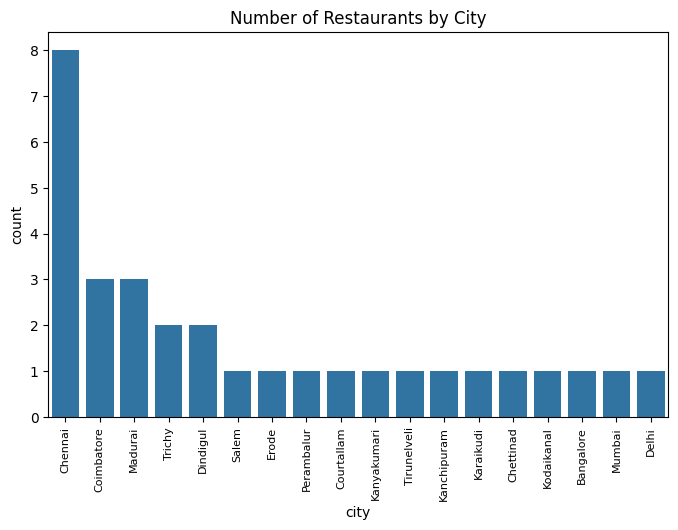

In [80]:
# Chart 1 – Restaurants by City

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='city', order=df['city'].value_counts().index)
plt.xticks(fontsize= 8, rotation=90)
plt.title("Number of Restaurants by City")
plt.show()


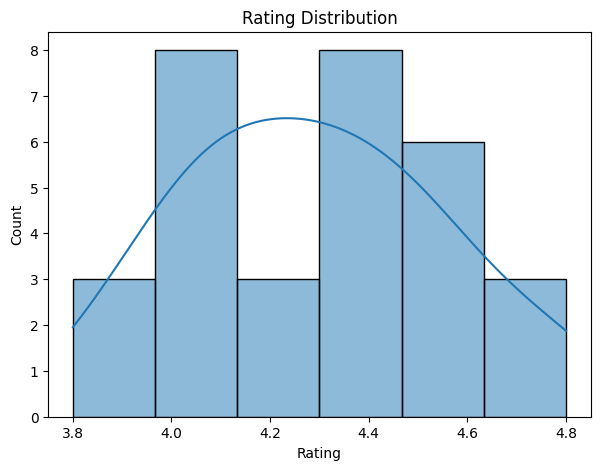

In [81]:
# Chart 2 – Rating Distribution (Histogram)


plt.figure( figsize= (7, 5))
sns.histplot(df["rating"], bins= 6, kde= True)
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

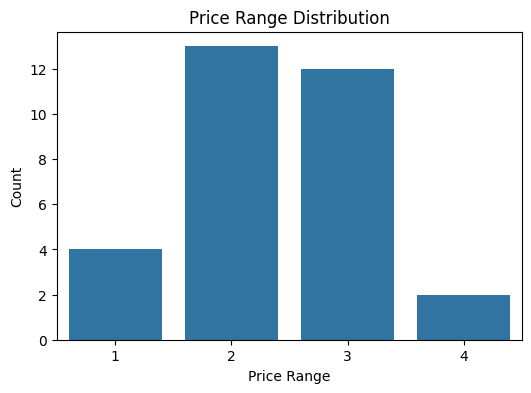

In [82]:
# Chart 3 - Price Range Distribution

plt.figure(figsize= (6, 4))
sns.countplot(data= df, x="price_range")
plt.title("Price Range Distribution")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

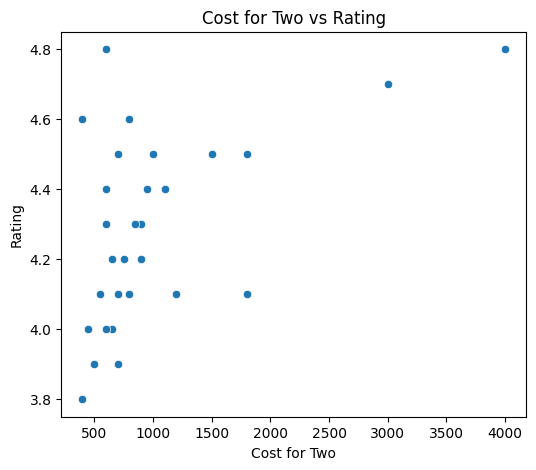

In [83]:
# Chart 4 – Cost for two vs Rating (Scatter Plot)

plt.figure(figsize= (6, 5))
sns.scatterplot(data= df, x= "cost_for_two", y= "rating")
plt.title("Cost for Two vs Rating")
plt.xlabel("Cost for Two")
plt.ylabel("Rating")
plt.show()

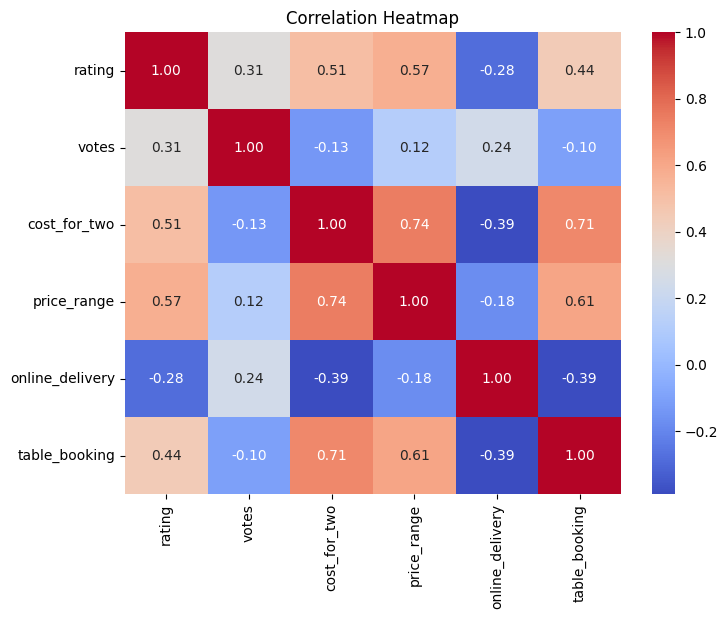

In [84]:
# Chart 5 – Correlation Heatmap (Very Important)
# This shows relationship between numeric columns.

# Create correlation matrix
# [1:] remove the rest_id (0th index) from both rows and columns of the correlation matrix.
corr_matrix = df.corr(numeric_only=True).iloc[1:, 1:]
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Correlation Heatmap")
plt.show()

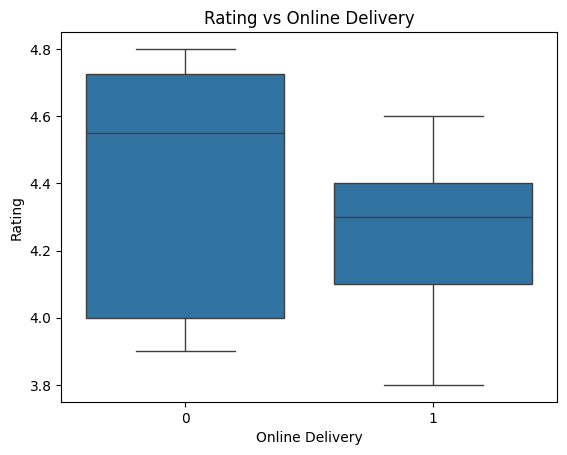

In [85]:
# Chart 6 — Rating vs Online Delivery (Boxplot)

# plt.figure(figsize= (5, 5))
sns.boxplot(data= df, x= "online_delivery", y= "rating")
plt.title("Rating vs Online Delivery")
plt.xlabel("Online Delivery")
plt.ylabel("Rating")
plt.show()

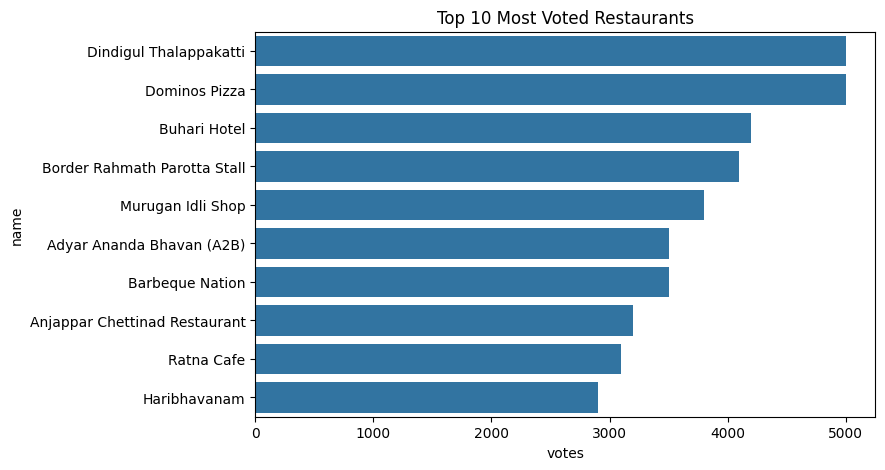

In [86]:
# Chart 7 - Top 10 Most Voted Restaurants

top_voted = df.sort_values(by='votes', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='votes', y='name', data=top_voted)

plt.title("Top 10 Most Voted Restaurants")
plt.show()


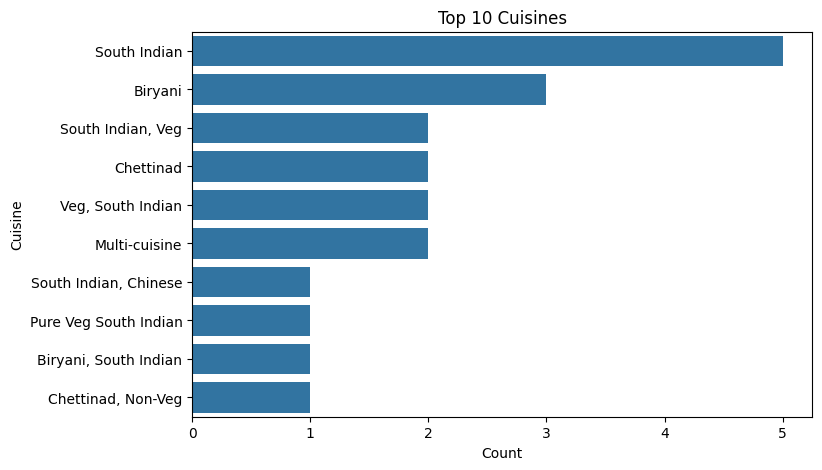

In [88]:
# Chart 8 - Cuisine Distribution

top_cuisine = df['cuisine'].value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_cuisine.values, y=top_cuisine.index)

plt.title("Top 10 Cuisines")
plt.xlabel("Count")
plt.ylabel("Cuisine")
plt.show()

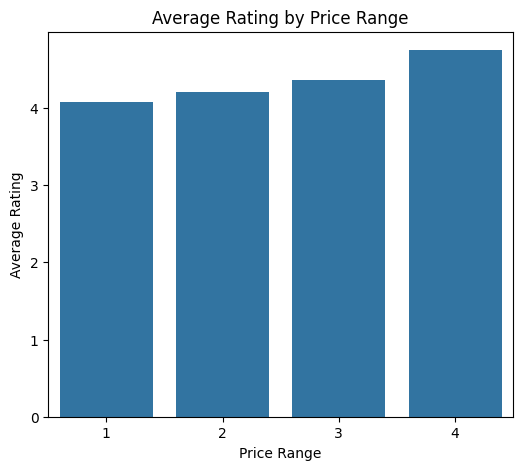

In [87]:
# Chart 9 - Average Rating by Price Range

avg_rating_price = df.groupby('price_range')['rating'].mean()

plt.figure(figsize=(6,5))
sns.barplot(x=avg_rating_price.index, y=avg_rating_price.values)

plt.title("Average Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Average Rating")
plt.show()



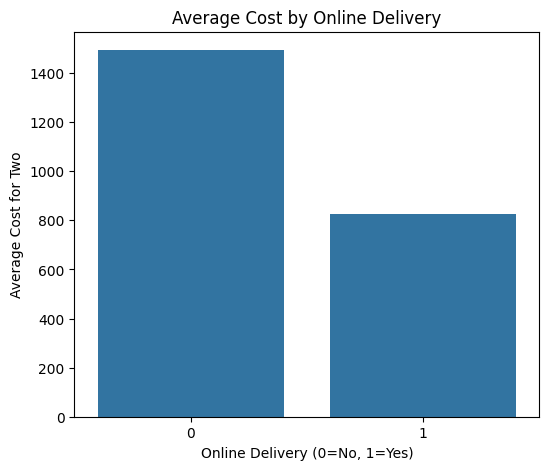

In [76]:
# Chart 10 - Average Cost for Delivery vs Non-Delivery

avg_cost_delivery = df.groupby('online_delivery')['cost_for_two'].mean()

plt.figure(figsize=(6,5))
sns.barplot(x=avg_cost_delivery.index, y=avg_cost_delivery.values)

plt.title("Average Cost by Online Delivery")
plt.xlabel("Online Delivery (0=No, 1=Yes)")
plt.ylabel("Average Cost for Two")
plt.show()


1️⃣ Rating Distribution

Most restaurants have ratings between 3.0 and 4.0, indicating moderate customer satisfaction overall. Very few restaurants have extremely low or extremely high ratings.

Business Meaning: The market is competitive, and most restaurants operate within an average satisfaction range.

---

2️⃣ Price Range vs Rating

There is no strong relationship between price range and rating. Higher-priced restaurants do not necessarily receive better ratings.

Business Meaning:
Customers value quality and experience more than just pricing level.

---

3️⃣ Votes vs Rating

Restaurants with higher votes tend to have slightly better ratings.

Business Meaning:
Popular restaurants build trust and credibility, which may positively influence ratings.

---

4️⃣ Online Delivery Analysis

Restaurants offering online delivery are common in mid-range price categories.

Business Meaning:
Online delivery is important for competitive positioning, especially in urban markets.

---

5️⃣ Cost for Two vs Rating

Cost does not show a strong direct relationship with rating.

Business Meaning:
Customer satisfaction is influenced by multiple qualitative factors beyond pricing.

---

6️⃣ Correlation Heatmap Insight

Correlation between numerical features is generally weak.

Business Meaning:
Restaurant ratings are influenced by complex, non-numeric factors such as food quality, service, and ambience.

---
